In [77]:
import pandas as pd
import numpy as np

In [78]:
df = pd.read_csv("05_clothing_inicial.csv")
df.head()

,Clothing ID,Age,Title,Review Text,Review Sentiment,Items Bought
0,243,41,Perfect pj's!,"I cannot say enough about these pajama pants. they're beautiful and crazy comfortable. it's a nice change from black or grey. i also love that there are no pockets because i hate how they jut out on me. i wanted a petite l because i am short, but the regular large is fine. i just wear them higher up on my hips. i normally wait for sales on sleepwear, but i couldn't resist on these. they're well worth the investment!",Positive,4.0
1,1081,35,Green not as pictured,"I honestly never even tried this on - i ordered it and when it arrived it was not the kelly green color pictured, it was more of a dark bland green color. love the brand and very soft but had to return.",Positive,1.0
2,861,39,Great casual tshirt!,"I love this t-shirt! it is so soft, fits true to size and great with jeans or shorts. i purchased in yellow and plan to purchase other colors!",Positive,10.0
3,829,47,NaN,"Not sure about this yet. reordered larger size because it hits much higher than shown. belly peeked out from under it! ordered 6 and i'm normally a small/6. like the design but really short.,",Neutral,7.0
4,1121,37,S petite is oversized,"I usually wear a s petite so that's what i initially got in this. i'm 5'2"", 32c-27-36. the shoulders were about an inch too wide on either side, the sides along the top had tons of extra fabric (almost like batwings or a dolman cut) and the waist was at least 6"" too big! i'm re-ordering in petite xs and hoping for the best, because this is a gorgeous coat.",Positive,1.0


In [79]:
df.shape

(5872, 6)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Clothing ID       5872 non-null   int64  
 1   Age               5872 non-null   int64  
 2   Title             4860 non-null   object 
 3   Review Text       5633 non-null   object 
 4   Review Sentiment  5872 non-null   object 
 5   Items Bought      5872 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 275.4+ KB


In [81]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'review_sentiment',
       'items_bought'],
      dtype='object')

In [82]:
df.isna().sum()

clothing_id            0
age                    0
title               1012
review_text          239
review_sentiment       0
items_bought           0
dtype: int64

In [83]:
df[["title", "review_text"]].isna().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Length: 5872, dtype: bool

In [84]:
df[df[["title", "review_text"]].isna().all(axis=1)]

,clothing_id,age,title,review_text,review_sentiment,items_bought
16,861,33,NaN,NaN,Positive,2.0
48,895,34,NaN,NaN,Positive,4.0
74,872,67,NaN,NaN,Positive,1.0
77,1009,27,NaN,NaN,Positive,2.0
102,1104,35,NaN,NaN,Positive,1.0
...,...,...,...,...,...,...
5805,1042,32,NaN,NaN,Neutral,3.0
5829,1054,29,NaN,NaN,Negative,3.0
5833,1072,68,NaN,NaN,Negative,4.0
5854,831,55,NaN,NaN,Positive,1.0


In [85]:
df = df[~df[["title", "review_text"]].isna().all(axis=1)]
df.shape

(5633, 6)

In [86]:
df.title.fillna("", inplace=True)
df.isna().any()

clothing_id         False
age                 False
title               False
review_text         False
review_sentiment    False
items_bought        False
dtype: bool

In [87]:
pd.set_option('display.max_colwidth', None)

In [88]:
df[df['review_sentiment']=='Positive'].head(5)[['title','review_text']]

,title,review_text
0,Perfect pj's!,"I cannot say enough about these pajama pants. they're beautiful and crazy comfortable. it's a nice change from black or grey. i also love that there are no pockets because i hate how they jut out on me. i wanted a petite l because i am short, but the regular large is fine. i just wear them higher up on my hips. i normally wait for sales on sleepwear, but i couldn't resist on these. they're well worth the investment!"
1,Green not as pictured,"I honestly never even tried this on - i ordered it and when it arrived it was not the kelly green color pictured, it was more of a dark bland green color. love the brand and very soft but had to return."
2,Great casual tshirt!,"I love this t-shirt! it is so soft, fits true to size and great with jeans or shorts. i purchased in yellow and plan to purchase other colors!"
4,S petite is oversized,"I usually wear a s petite so that's what i initially got in this. i'm 5'2"", 32c-27-36. the shoulders were about an inch too wide on either side, the sides along the top had tons of extra fabric (almost like batwings or a dolman cut) and the waist was at least 6"" too big! i'm re-ordering in petite xs and hoping for the best, because this is a gorgeous coat."
6,,"Super soft, cozy cardigan! i have a long torso and this is just the right length to cover my behind! i wish retailer would carry more sweaters with this shape. the sweater is soft and light - perfect for every day and you could wear it year round, although with its lighter weight, it might not be as perfect for winter. i purchased this in the kelly green color and it's gorgeous. i have it on right now!"


In [89]:
df[df['review_sentiment']=='Neutral'].head(5)[['title', 'review_text']]

,title,review_text
3,,"Not sure about this yet. reordered larger size because it hits much higher than shown. belly peeked out from under it! ordered 6 and i'm normally a small/6. like the design but really short.,"
14,Belia peplum top,"I really wanted this top to work but i felt that it was big and boxy. it's shorter in the front and longer in the back. the seam and peplum hit at a strange place and made me look disheveled. it's definitely worth trying on, but didn't fit me."
26,Nice top but couldn't get over the bubble hem,I like the pattern and material on this top but the bubble hem isn't flattering on my figure. i would recommend this top if you are tiny and petite.
38,Disappointed!,"I wanted to love this dress because the color is so amazing, but the arm holes are huge! i am petite and tried this on and it just sadly didn't work."
40,"Good cut, bad texture","The dress has a flattering cut and is a nice color. but, the fabric looks like old, matted carpet. i will be returning."


In [90]:
df[df['review_sentiment']=='Negative'].head(5)[['title', 'review_text']]

,title,review_text
5,Short mumu,"On me, thsi was ginormous, looked like a mu mu. it is pretty, but there was just too much fabric, even in the smallest size. the quality seems nice, and it looks pretty, but overwhelming. i will say, i think it would work on tail lean people, i have pretty muscular shoulders, so the off shoulder look with that much fabric made me look 30 pounds heavier, no joke. fabric is soft though. give it a try, just not for me...\r\n\r\nref: 115 lbs, 30dd, 26.5 in waist."
7,Really wanted to like it,"The sides scooped up a bit too much on me. i was hoping to be able to tuck this into a skirt and wear to work, but there were definitely some gaps that showed the side of my midriff. back it goes. :("
21,Not like the pic,The yellow is not as bright as the pic and the tee shirt base color is more off white/oatmeal making the shirt look much more drab in person than in the pics. fit was ok but nothing special about this and will be returning.
33,Unflattering fit,Large and the material is too bulky. i returned it.
39,Really disappointed,"Loved how this draped and im super petite 5'1""(32b bust) and this was seriously one of the most ill fitting items i have every owned. i purchased the pxs and it was huge. i hope this has a better fit as the other reviewers seem to have a more positive review. i was just appalled as to how bad the measurements were off. unfortunately the straps are not adjustable so this went below my chest. too sad retailer, please get the fit right!!"


In [91]:
example = df.review_text[4]
example

'I usually wear a s petite so that\'s what i initially got in this. i\'m 5\'2", 32c-27-36. the shoulders were about an inch too wide on either side, the sides along the top had tons of extra fabric (almost like batwings or a dolman cut) and the waist was at least 6" too big! i\'m re-ordering in petite xs and hoping for the best, because this is a gorgeous coat.'

In [92]:
example = example.lower()
example

'i usually wear a s petite so that\'s what i initially got in this. i\'m 5\'2", 32c-27-36. the shoulders were about an inch too wide on either side, the sides along the top had tons of extra fabric (almost like batwings or a dolman cut) and the waist was at least 6" too big! i\'m re-ordering in petite xs and hoping for the best, because this is a gorgeous coat.'

In [93]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

don't -> ([don, t], [dont], [don, 't], [do, not])
i've -> ([i, have], [ive], [i, ve])

In [94]:
for c in punctuation:
    example = example.replace(c, "")
example

'i usually wear a s petite so thats what i initially got in this im 52 32c2736 the shoulders were about an inch too wide on either side the sides along the top had tons of extra fabric almost like batwings or a dolman cut and the waist was at least 6 too big im reordering in petite xs and hoping for the best because this is a gorgeous coat'

In [95]:
import re
re.sub(r"\d+", "", example)

'i usually wear a s petite so thats what i initially got in this im  c the shoulders were about an inch too wide on either side the sides along the top had tons of extra fabric almost like batwings or a dolman cut and the waist was at least  too big im reordering in petite xs and hoping for the best because this is a gorgeous coat'

In [96]:
example = re.sub(r"\d+", "", example)
example.split()

['i',
 'usually',
 'wear',
 'a',
 's',
 'petite',
 'so',
 'thats',
 'what',
 'i',
 'initially',
 'got',
 'in',
 'this',
 'im',
 'c',
 'the',
 'shoulders',
 'were',
 'about',
 'an',
 'inch',
 'too',
 'wide',
 'on',
 'either',
 'side',
 'the',
 'sides',
 'along',
 'the',
 'top',
 'had',
 'tons',
 'of',
 'extra',
 'fabric',
 'almost',
 'like',
 'batwings',
 'or',
 'a',
 'dolman',
 'cut',
 'and',
 'the',
 'waist',
 'was',
 'at',
 'least',
 'too',
 'big',
 'im',
 'reordering',
 'in',
 'petite',
 'xs',
 'and',
 'hoping',
 'for',
 'the',
 'best',
 'because',
 'this',
 'is',
 'a',
 'gorgeous',
 'coat']

In [97]:
example = example.split()

download stopwords from nltk

In [98]:
stop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 
'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 
'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 
'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 
'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 
'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 
'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 
'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 
'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 
'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 
'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 
'here', 'than']

In [99]:
example = [token for token in example if len(token)>2 and token not in stop_words]
example

['usually',
 'wear',
 'petite',
 'thats',
 'initially',
 'got',
 'shoulders',
 'inch',
 'wide',
 'either',
 'side',
 'sides',
 'along',
 'top',
 'tons',
 'extra',
 'fabric',
 'almost',
 'like',
 'batwings',
 'dolman',
 'cut',
 'waist',
 'least',
 'big',
 'reordering',
 'petite',
 'hoping',
 'best',
 'gorgeous',
 'coat']

In [100]:
from collections import Counter
Counter(example).most_common(10)

[('petite', 2),
 ('usually', 1),
 ('wear', 1),
 ('thats', 1),
 ('initially', 1),
 ('got', 1),
 ('shoulders', 1),
 ('inch', 1),
 ('wide', 1),
 ('either', 1)]

In [101]:
def tokenize(text):
    clean_text = text.lower()
    for c in punctuation:
        clean_text = clean_text.replace(c,"")
    clean_text = re.sub(r"\d+", "", clean_text)
    clean_text = clean_text.split()
    clean_text = [token for token in clean_text if len(token)>2 and token not in stop_words]
    return clean_text

def find_most_common(data, n=10):
    clean_list = []
    for text in data:
        tokenized_text = tokenize(text)
        clean_list.extend(tokenized_text)
    return Counter(clean_list).most_common(n)

In [102]:
find_most_common(df[df['review_sentiment']=='Positive']['review_text'])

[('dress', 1988),
 ('love', 1901),
 ('size', 1746),
 ('fit', 1378),
 ('wear', 1360),
 ('great', 1333),
 ('top', 1332),
 ('like', 1191),
 ('color', 872),
 ('would', 848)]

In [103]:
find_most_common(df[df['review_sentiment']=='Negative']['review_text'])

[('dress', 274),
 ('like', 264),
 ('fabric', 177),
 ('top', 169),
 ('size', 164),
 ('would', 163),
 ('fit', 157),
 ('back', 143),
 ('look', 141),
 ('ordered', 133)]

In [104]:
find_most_common(df[df['review_sentiment']=='Neutral']['review_text'])

[('dress', 320),
 ('top', 276),
 ('like', 247),
 ('fit', 244),
 ('size', 237),
 ('would', 225),
 ('small', 183),
 ('love', 180),
 ('fabric', 180),
 ('look', 173)]

smote imblearn

In [105]:
def process_text(data):
    clean_list = []
    for text in data:
        tokenized_text = tokenize(text)
        clean_list.append(tokenized_text)
    return clean_list

df_copy = df.copy()
df_copy.review_text = process_text(df_copy.review_text)

In [106]:
df_copy.review_text.head(5)

0    [cannot, say, enough, pajama, pants, theyre, beautiful, crazy, comfortable, nice, change, black, grey, also, love, pockets, hate, jut, wanted, petite, short, regular, large, fine, wear, higher, hips, normally, wait, sales, sleepwear, couldnt, resist, theyre, well, worth, investment]
1                                                                                                                                                          [honestly, never, even, tried, ordered, arrived, kelly, green, color, pictured, dark, bland, green, color, love, brand, soft, return]
2                                                                                                                                                                                        [love, tshirt, soft, fits, true, size, great, jeans, shorts, purchased, yellow, plan, purchase, colors]
3                                                                                                                                    

<AxesSubplot:title={'center':'age'}, xlabel='[review_sentiment]'>

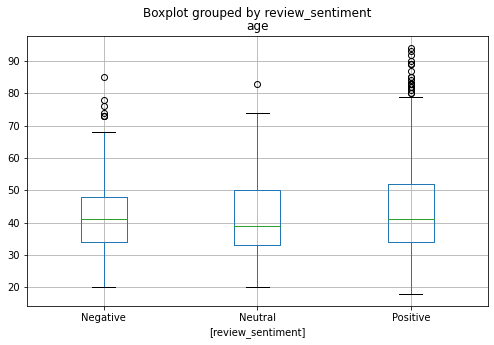

In [107]:
df[['age', 'review_sentiment']].boxplot(by="review_sentiment", figsize=(8, 5))

<AxesSubplot:title={'center':'items_bought'}, xlabel='[review_sentiment]'>

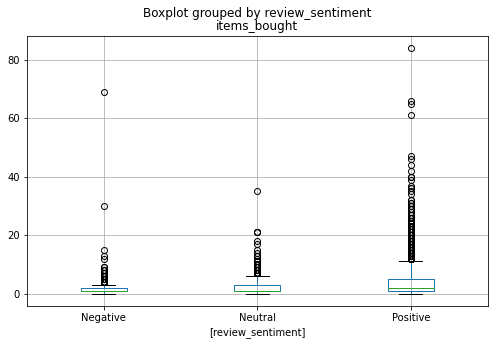

In [108]:
df[['items_bought', 'review_sentiment']].boxplot(by='review_sentiment', figsize=(8, 5))

In [109]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['review_sentiment'])
encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [110]:
labels_encoded = encoder.transform(df['review_sentiment'])
labels_encoded

array([2, 2, 2, ..., 2, 2, 0])

In [111]:
encoder.inverse_transform(labels_encoded)

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [112]:
df['sentiment_encoded'] = labels_encoded

In [113]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df.sentiment_encoded, random_state=42)

In [114]:
df_train.shape, df_test.shape

((4506, 7), (1127, 7))

In [115]:
df_train.sentiment_encoded.value_counts(normalize=True)

2    0.771638
1    0.124501
0    0.103862
Name: sentiment_encoded, dtype: float64

In [116]:
df_test.sentiment_encoded.value_counts(normalize=True)

2    0.771961
1    0.124224
0    0.103815
Name: sentiment_encoded, dtype: float64

https://scikit-learn.org/stable/modules/feature_extraction.html#feature-hashing

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

vizer(max_featuect = CountVectorres=1000, stop_words="english")
vect.fit(df_train['review_text'])
vect.get_feature_names()#[50:60]

/Users/LittlePrincess/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '0p',
 '10',
 '100',
 '105',
 '115',
 '118',
 '12',
 '120',
 '125',
 '130',
 '135',
 '135lbs',
 '14',
 '140',
 '145',
 '150',
 '20',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '32',
 '32c',
 '32dd',
 '34',
 '34b',
 '34c',
 '34d',
 '35',
 '36',
 '36c',
 '36d',
 '36dd',
 '38',
 '39',
 '40',
 'able',
 'absolutely',
 'actually',
 'add',
 'added',
 'addition',
 'adds',
 'adjust',
 'adjustable',
 'adorable',
 'adore',
 'afraid',
 'ag',
 'ago',
 'agree',
 'airy',
 'allows',
 'altered',
 'amazing',
 'ankle',
 'appear',
 'appears',
 'appreciate',
 'appropriate',
 'area',
 'areas',
 'aren',
 'arm',
 'armholes',
 'arms',
 'arrived',
 'athletic',
 'attached',
 'attention',
 'attractive',
 'available',
 'average',
 'away',
 'awesome',
 'awkward',
 'baby',
 'bad',
 'bag',
 'baggy',
 'band',
 'barely',
 'based',
 'basic',
 'bathing',
 'beach',
 'beading',
 'beautiful',
 'beautifully',
 'beauty',
 'beige',
 'believe',
 'bell',
 'belly',
 'belt',
 'best',
 'better',
 'beware',
 'big',
 '

In [118]:
train_text_features = vect.transform(df_train['review_text'])
train_text_features.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [119]:
train_text_features.shape

(4506, 1000)

In [120]:
test_text_features = vect.transform(df_test['review_text'])
test_text_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [121]:
test_text_features.shape

(1127, 1000)